# **Using K-Means**

## **Load the Image**

In [ ]:
import cv2

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Semantic Segmentation/street01.jpg"
image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## **Reshape the image into a 2D array of Pixels.**

In [ ]:
pixels = rgb_image.reshape((-1, 3))

## **Apply K-Means Clustering to segment the image into 3 clusters**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(pixels)
segmented_image = kmeans.labels_.reshape(rgb_image.shape[0], rgb_image.shape[1])

## **Create a color map for visualization**
* Change the color as needed

In [ ]:
import numpy as np

In [ ]:
colors = np.array([[255, 0, 0],[0, 255, 0],[0, 0, 255]]) # red, green, blue

## **Map the labels into the colors**

In [ ]:
colord_segmented_image = colors[segmented_image]

## **Convert the colored image back to BGR fro OpenCV visualization**

In [ ]:
bgr_colord_segmented_image = cv2.cvtColor(colord_segmented_image.astype(np.uint8), cv2.COLOR_RGB2BGR)

## **Show the result**

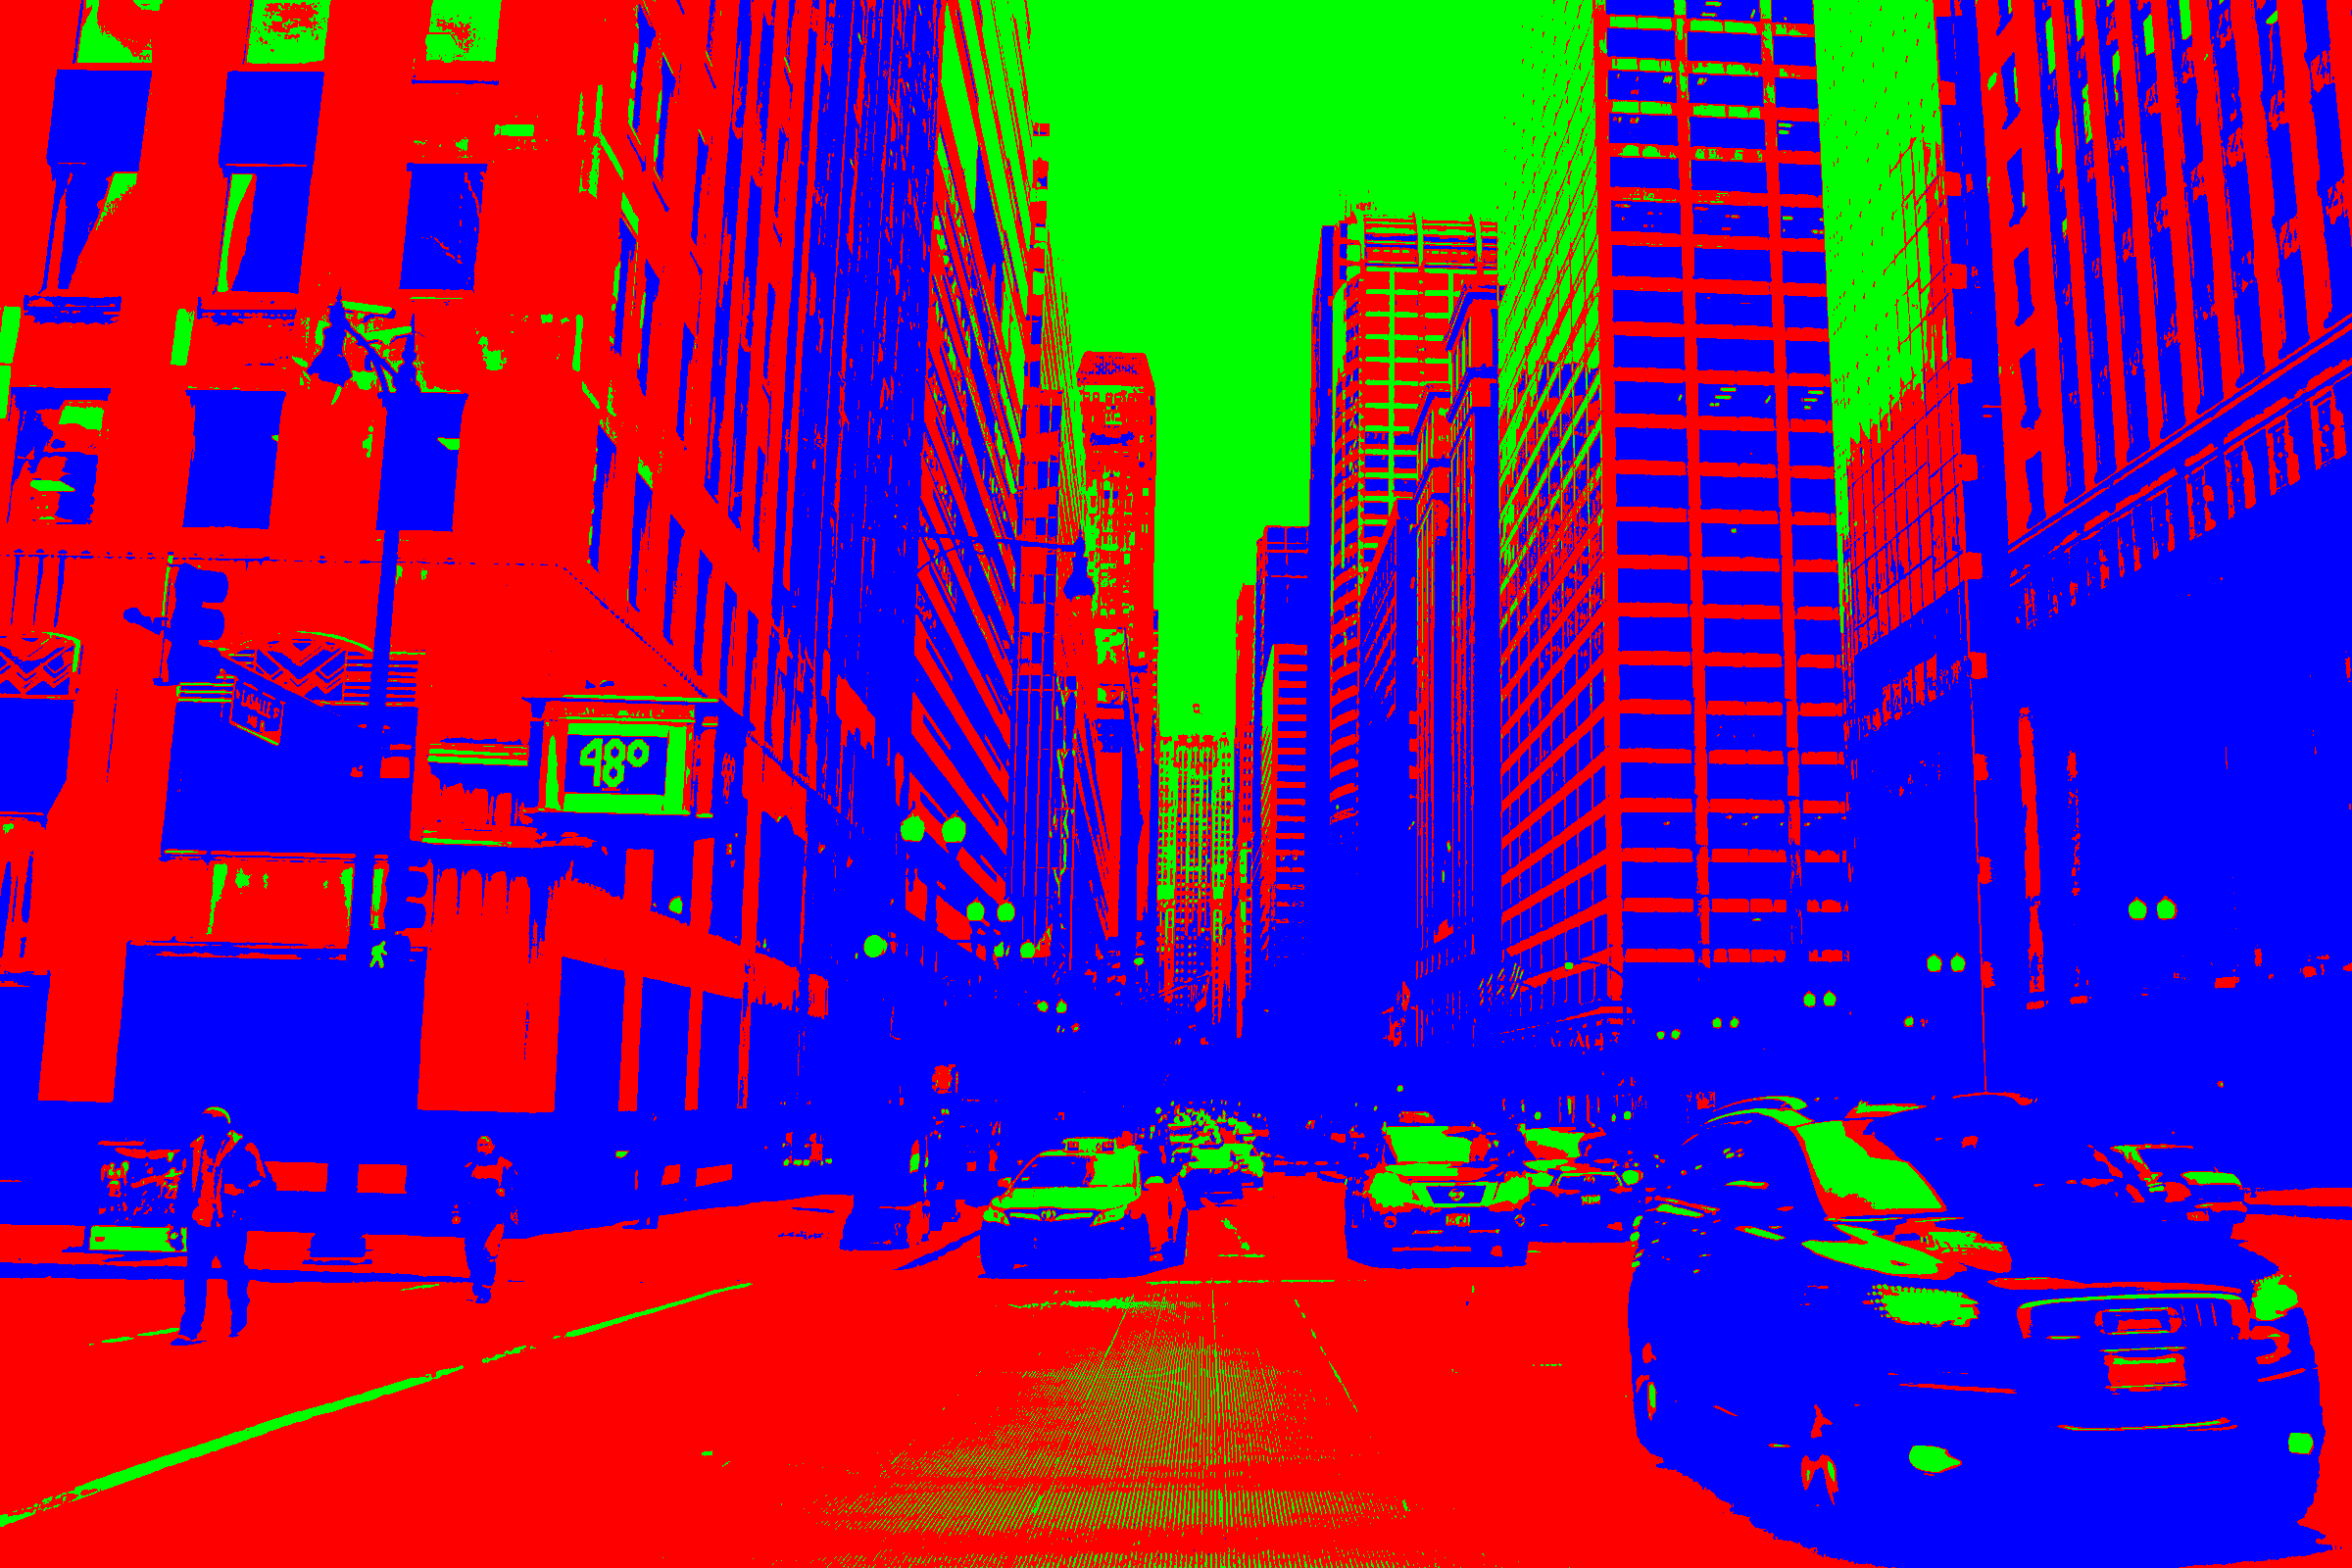

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(bgr_colord_segmented_image)

# **Using MeanShift**

## **Load the Image**

In [ ]:
import cv2

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Semantic Segmentation/street01.jpg"
image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## **Reshape the image into a 2D array of Pixels.**

In [ ]:
pixels = rgb_image.reshape((-1, 3))

## **Estimate bandwidth for MeanShift**

In [ ]:
from sklearn.cluster import estimate_bandwidth

In [ ]:
bw = estimate_bandwidth(pixels, quantile = 0.1, n_samples = 500)

## **Apply MeanShift Clustering**

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
ms = MeanShift(bandwidth = bw, bin_seeding = True)
ms.fit(pixels)

MeanShift(bandwidth=22.932682985034916, bin_seeding=True)

## **Get the labels and cluster centers**

In [ ]:
labels = ms.labels_
segmented_image = labels.reshape(rgb_image.shape[0], rgb_image.shape[1])

## **Create a color map for visualization**
* Change the color as needed

In [ ]:
import numpy as np

In [ ]:
unique_labels = np.unique(labels)
colors = np.random.randint(0, 255, size = (len(unique_labels), 3))

## **Map the labels into the colors**

In [ ]:
colord_segmented_image = colors[segmented_image]

## **Convert the colored image back to BGR fro OpenCV visualization**

In [ ]:
bgr_colord_segmented_image = cv2.cvtColor(colord_segmented_image.astype(np.uint8), cv2.COLOR_RGB2BGR)

## **Show the result**

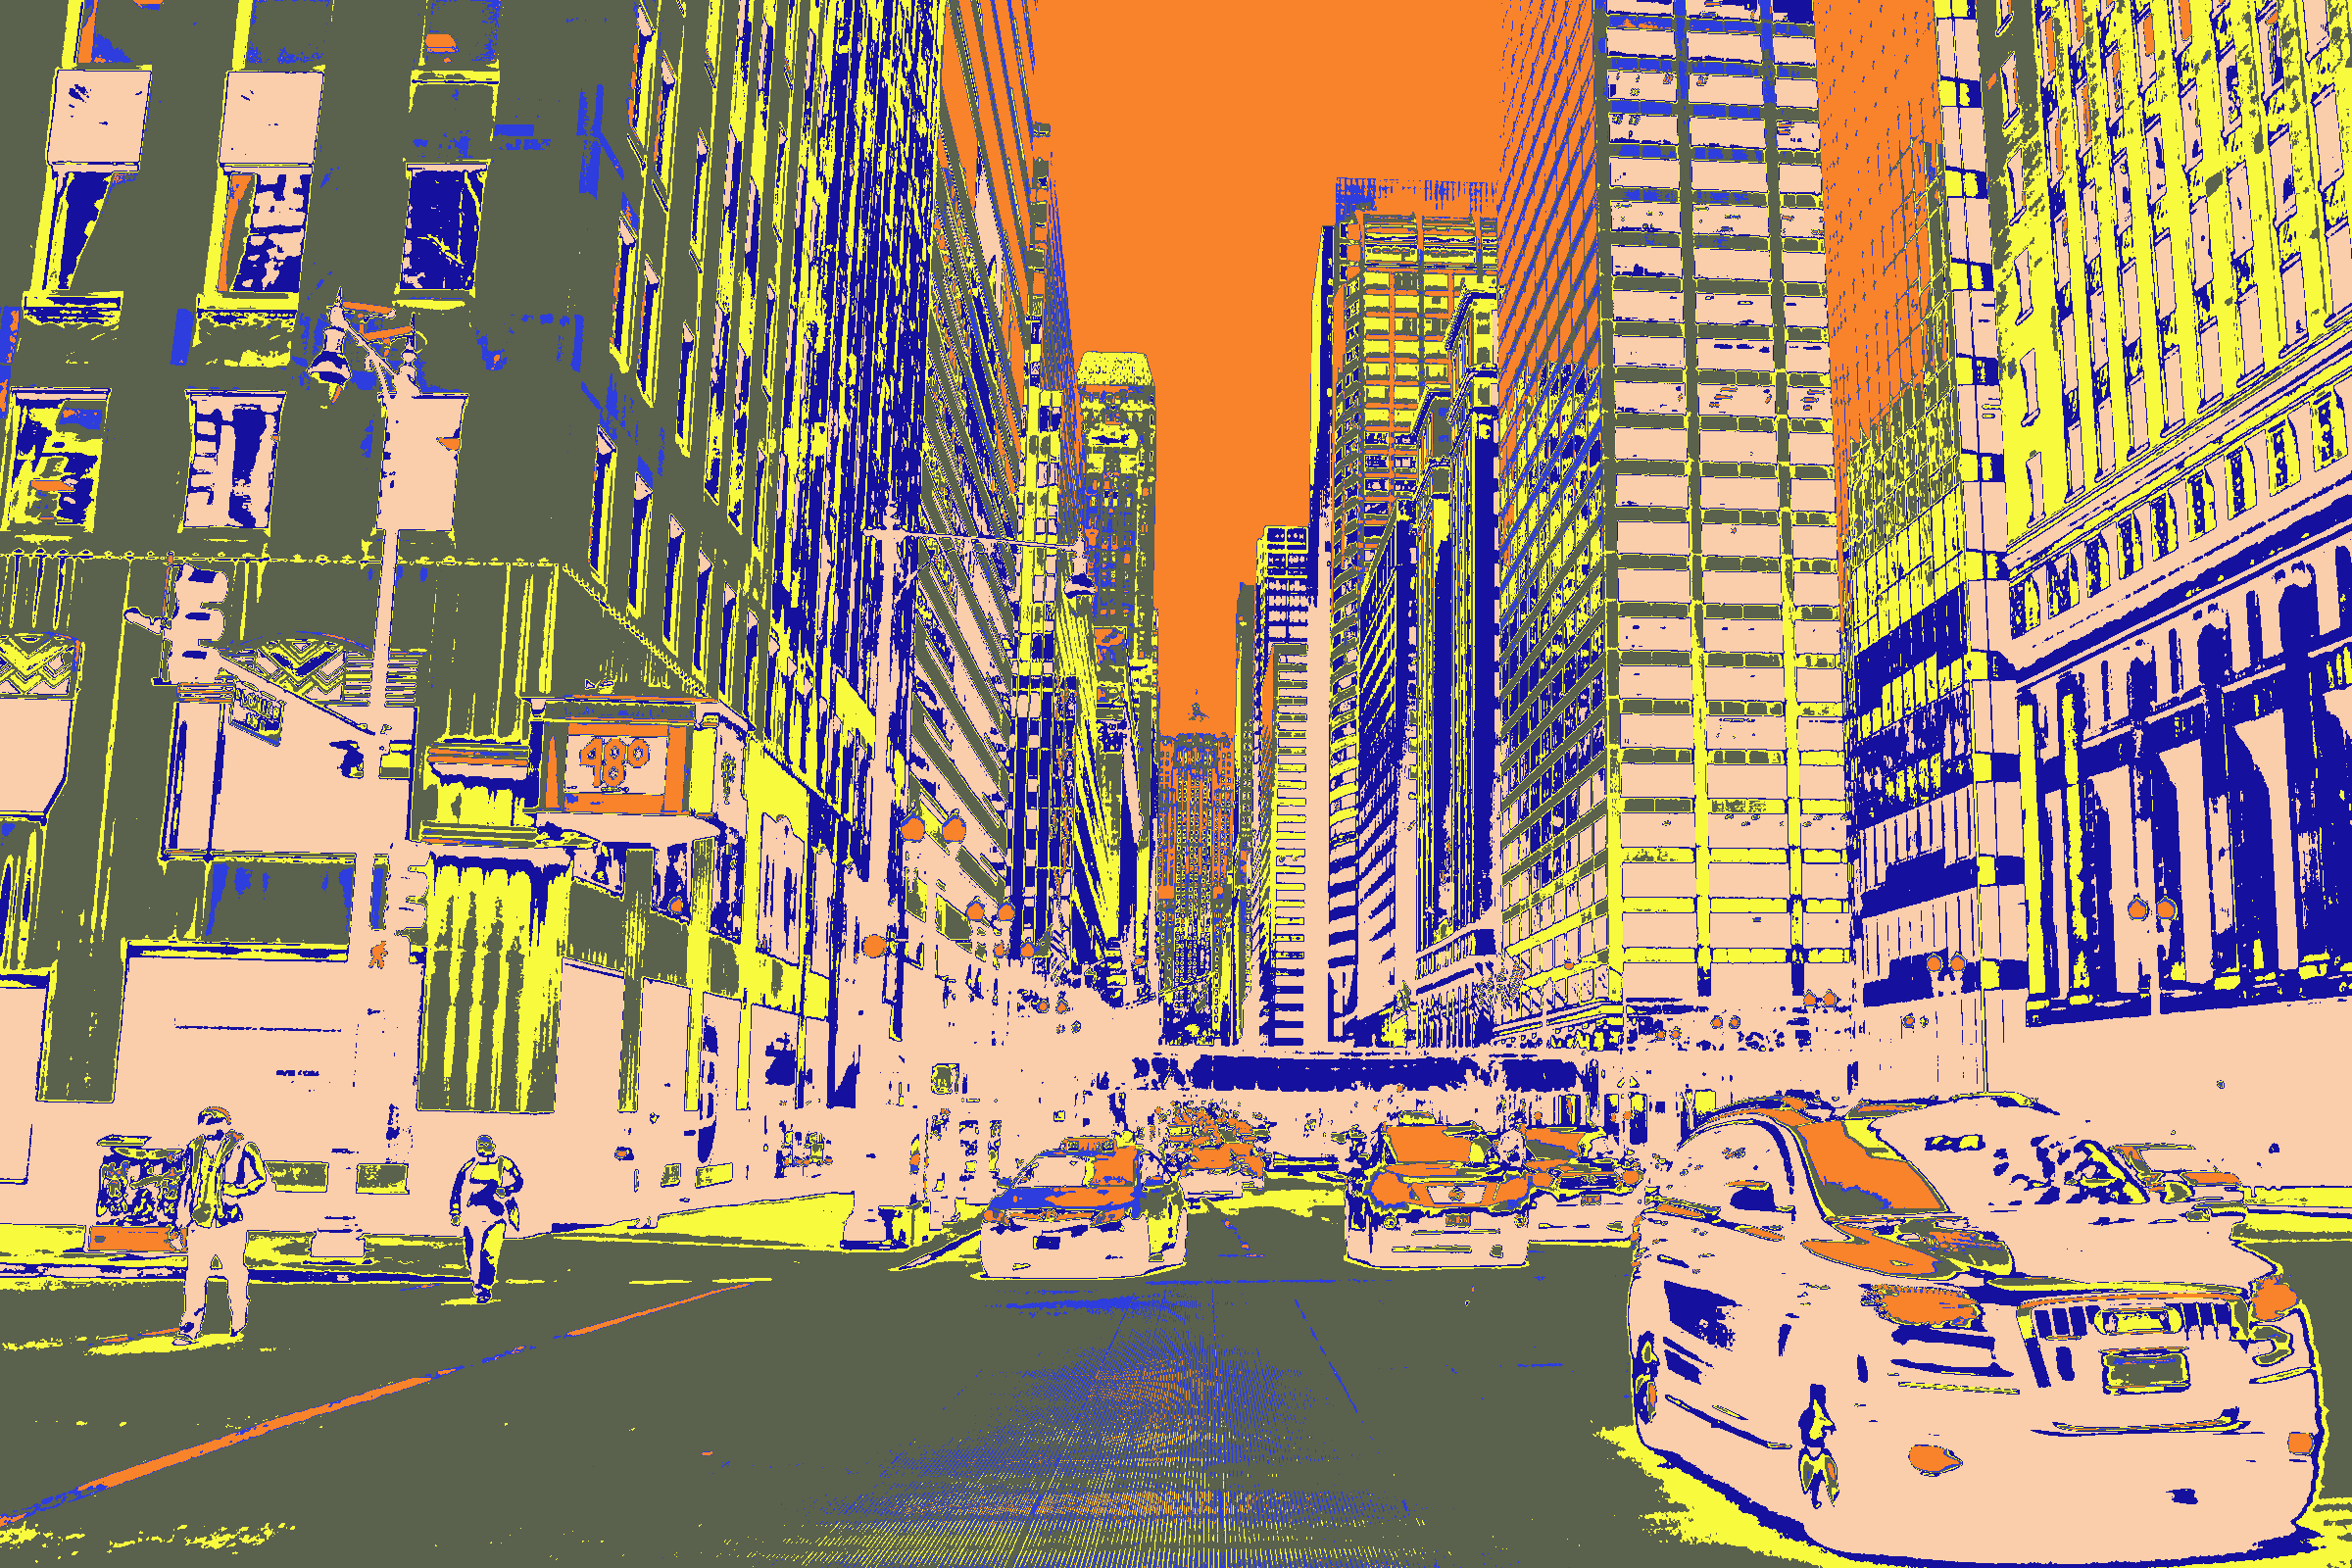

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(bgr_colord_segmented_image)